## Deep Learning Project


Course: CIS 62<br>
Professor: Angel Hernandez<br>
Student: Jack Chen<br>
<br>
Purpose:<br>
- hello world
<br>

Details:<br>
1. Load libraries, data cleaning<br>
2. Exploratory Data Analysis (EDA)<br>
3. Deep Learning<br>
4. Conclusion<br>
5. References<br>

In [2]:
!pip install xgboost

## Libraries, Functions, Load/Cleaning Data

### Load Libraries

In [102]:
# Parsing
import requests
from bs4 import BeautifulSoup
# Alpha Vantage API - stock data
#from alpha_vantage.timeseries import TimeSeries
#from alpha_vantage.fundamentaldata import FundamentalData
#from alpha_vantage.cryptocurrencies import CryptoCurrencies
#from alpha_vantage.techindicators import TechIndicators

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style("whitegrid")

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model Featuring
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
# from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from tensorflow.keras.layers import Dense,Dropout, Input, Activation, LeakyReLU, Bidirectional
from tensorflow.keras.optimizers import SGD

import keras
#from keras import lstm

# Models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from tensorflow.keras import Sequential, Model


# Analyze Results
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

### AlphaVantage API

In [ ]:
# Variable - store Alpha Vantage API key
# path =  r'C:\Users\Gumo\Desktop\Git\Notebook\keys\alphaVantage.txt'
# with open(path, mode='r') as w:
#     key = (w.readline())

In [ ]:
# URL Method
# def alpha(function, symbol):
#     url = 'https://www.alphavantage.co/query?function='+function+'&symbol='+symbol+'&apikey='+key
#     response = requests.get(url)

# Function AlphaVantage
def alpha(symbol, function, period=None, typ = None, tim=None):
    
    # Funciton - TimeSeries
    if function == 't':
        # Instance - TimeSeries Instance
        ts = TimeSeries(key = key, output_format='pandas')
        if period == 'd':
            data = ts.get_daily_adjusted(symbol, outputsize=outputsize)[0]
        elif period == 'w':
            data = ts.get_weekly_adjusted(symbol)[0]
        elif period == 'm':
            data = ts.get_monthly_adjusted(symbol)[0]

    # Funciton - FundamentalData
    elif function == 'f':
        # Instance - FundamentalData Instance
        fd = FundamentalData(key, output_format='pandas')
        if period == 'q':
            if typ == 'i':
                data = fd.get_income_statement_quarterly(symbol)[0]
                data.index = data.iloc[:,0]
                data=data.iloc[:,2:]
            elif typ == 'b':
                data = fd.get_balance_sheet_quarterly(symbol)[0]
                data.index = data.iloc[:,0]
                data=data.iloc[:,2:]
            elif typ=='c':
                data = fd.get_cash_flow_quarterly(symbol)[0]
                data.index = data.iloc[:,0]
                data=data.iloc[:,2:]
        elif period =='a':
            if typ == 'i':
                data = fd.get_income_statement_annual(symbol)[0]
                data.index = data.iloc[:,0]
                data=data.iloc[:,2:]
            elif typ == 'b':
                data = fd.get_balance_sheet_annual(symbol)[0]
                data.index = data.iloc[:,0]
                data=data.iloc[:,2:]
            elif typ=='c':
                data = fd.get_cash_flow_annual(symbol)[0]
                data.index = data.iloc[:,0]
                data=data.iloc[:,2:]
    
    # Funciton - TechnicalIndicator            
    elif function =='ti':
        ti = TechIndicators(key,output_format='pandas')

        # reassign period into TI format
        if period == 'm':
            period = 'monthly'
        elif period =='w':
            period = 'weekly'
        elif period == 'd':
            period ='daily'

        if typ == 'rsi':
            data=ti.get_rsi(symbol,interval=period,time_period=tim,series_type='close')[0]
        elif typ =='so':
            data = ti.get_stoch(symbol,interval=period)[0]
            
    # Funciton - CC
    elif function == 'c':
        # Instance - Crypto
        cc = CryptoCurrencies(key, output_format='pandas')
        pass
    return data

In [ ]:
# Variable Size
outputsize = 'compact'

# Variable Stock
symbol = 'cvx'

# Variable Function - t, f, c, ti (timeseries, financialdata, crypto, technical indicator)
function = 'ti'

# Variable Period
# TimeSeries: d,w,m,i (daily, weekly, monthly, interval(mins))
# Fundamental: q,a (quarterly,annually)
# Technical: d,w,m, (interval(mins))
period = 'm'

# Varible - Type
# Fundamental: i,b,c
# Technical: so,rsi
typ ='so'

# Varible - Time
tim = 60

info = alpha(symbol,function,period=period,typ = typ,tim=tim)
info.head()

In [ ]:
# save to local stock data
# info.to_csv('data/'+symbol.upper()+'stockPrice.csv')

### BeautifulSoup

In [ ]:
# Define a variable for the url of the site
site = "https://www.usinflationcalculator.com/inflation/current-inflation-rates/#:~:text=The%20annual%20inflation%20rate%20for,at%208%3A30%20a.m.%20ET"

In [ ]:
# Making a get request and assign the result to a variable response
response = requests.get(site)

#Check that the response was processed correctly
response.status_code

200

In [ ]:
# Extracting the HTML
#assign a variable html to response content.
html = response.content

# Checking that the reply is indeed an HTML code by inspecting the first 200 symbols
html[:200]

b'<!DOCTYPE html>\n<!--[if IE 7]>\n<html class="ie ie7" dir="ltr" lang="en-US"\n\tprefix="og: https://ogp.me/ns#" >\n<![endif]-->\n<!--[if IE 8]>\n<html class="ie ie8" dir="ltr" lang="en-US"\n\tprefix="og: https'

In [ ]:
#Convert HTML to a BeautifulSoup object, using the default parser of html  
#Create a BeautifulSoup object and store it in a variable named soup.
soup = BeautifulSoup(html, "html.parser")

In [ ]:
# The soup variable (BeautifulSoup object) we defined earlier can be seen as representing the whole document
soup

<!DOCTYPE html>

<!--[if IE 7]>
<html class="ie ie7" dir="ltr" lang="en-US"
	prefix="og: https://ogp.me/ns#" >
<![endif]-->
<!--[if IE 8]>
<html class="ie ie8" dir="ltr" lang="en-US"
	prefix="og: https://ogp.me/ns#" >
<![endif]-->
<!--[if !(IE 7) | !(IE 8) ]><!-->
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
<!--<![endif]-->
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-2181571-7"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-2181571-7');
</script>
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://www.usinflationcalculator.com/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://www.usinflationcalculator.com/wp-content/themes/twentyfourteen/js/html5.js"></script>


In [ ]:
#using prettify() method to turn a Beautiful Soup parse tree into a nicely formatted Unicode string,
#with a separate line for each tag and each string:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 7]>
<html class="ie ie7" dir="ltr" lang="en-US"
	prefix="og: https://ogp.me/ns#" >
<![endif]-->
<!--[if IE 8]>
<html class="ie ie8" dir="ltr" lang="en-US"
	prefix="og: https://ogp.me/ns#" >
<![endif]-->
<!--[if !(IE 7) | !(IE 8) ]><!-->
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
 <!--<![endif]-->
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-2181571-7">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-2181571-7');
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://www.usinflationcalculator.com/xmlrpc.php" rel="pingback"/>
  <!--[if lt IE 9]>
	<script src="https://www.usinflationcalculator.com/wp-content/themes/twentyfourteen/

In [ ]:
# Exporting the HTML to a file
with open('output/inflation_rate_response.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

In [ ]:
# creating list with all tables
tables = soup.find_all('table')

In [ ]:
# Inspect the value of the variable
tables

[<table cellpadding="0" cellspacing="0" width="110%">
 <tr height="17">
 <td align="right" height="17"><strong>Year</strong></td>
 <td align="right"><strong>Jan</strong></td>
 <td align="right"><strong>Feb</strong></td>
 <td align="right"><strong>Mar</strong></td>
 <td align="right"><strong>Apr</strong></td>
 <td align="right"><strong>May</strong></td>
 <td align="right"><strong>Jun</strong></td>
 <td align="right"><strong>Jul</strong></td>
 <td align="right"><strong>Aug</strong></td>
 <td align="right"><strong>Sep</strong></td>
 <td align="right"><strong>Oct</strong></td>
 <td align="right"><strong>Nov</strong></td>
 <td align="right"><strong>Dec</strong></td>
 <td align="right"><strong>Ave</strong></td>
 </tr>
 <tr>
 <td align="right" height="17"><strong>2022</strong></td>
 <td align="right">7.5</td>
 <td align="right">7.9</td>
 <td align="right">8.5</td>
 <td align="right">8.3</td>
 <td align="right"><em>Avail.<br/>
      June<br/>
      10</em></td>
 <td align="right"> </td>
 <td a

In [ ]:
#since there is only one table, set table as the first table in tables
table = tables[0]
#display table
table

<table cellpadding="0" cellspacing="0" width="110%">
<tr height="17">
<td align="right" height="17"><strong>Year</strong></td>
<td align="right"><strong>Jan</strong></td>
<td align="right"><strong>Feb</strong></td>
<td align="right"><strong>Mar</strong></td>
<td align="right"><strong>Apr</strong></td>
<td align="right"><strong>May</strong></td>
<td align="right"><strong>Jun</strong></td>
<td align="right"><strong>Jul</strong></td>
<td align="right"><strong>Aug</strong></td>
<td align="right"><strong>Sep</strong></td>
<td align="right"><strong>Oct</strong></td>
<td align="right"><strong>Nov</strong></td>
<td align="right"><strong>Dec</strong></td>
<td align="right"><strong>Ave</strong></td>
</tr>
<tr>
<td align="right" height="17"><strong>2022</strong></td>
<td align="right">7.5</td>
<td align="right">7.9</td>
<td align="right">8.5</td>
<td align="right">8.3</td>
<td align="right"><em>Avail.<br/>
     June<br/>
     10</em></td>
<td align="right"> </td>
<td align="right"> </td>
<td alig

In [ ]:
# extracting all rows
table.find_all('tr')

[<tr height="17">
 <td align="right" height="17"><strong>Year</strong></td>
 <td align="right"><strong>Jan</strong></td>
 <td align="right"><strong>Feb</strong></td>
 <td align="right"><strong>Mar</strong></td>
 <td align="right"><strong>Apr</strong></td>
 <td align="right"><strong>May</strong></td>
 <td align="right"><strong>Jun</strong></td>
 <td align="right"><strong>Jul</strong></td>
 <td align="right"><strong>Aug</strong></td>
 <td align="right"><strong>Sep</strong></td>
 <td align="right"><strong>Oct</strong></td>
 <td align="right"><strong>Nov</strong></td>
 <td align="right"><strong>Dec</strong></td>
 <td align="right"><strong>Ave</strong></td>
 </tr>, <tr>
 <td align="right" height="17"><strong>2022</strong></td>
 <td align="right">7.5</td>
 <td align="right">7.9</td>
 <td align="right">8.5</td>
 <td align="right">8.3</td>
 <td align="right"><em>Avail.<br/>
      June<br/>
      10</em></td>
 <td align="right"> </td>
 <td align="right"> </td>
 <td align="right"> </td>
 <td ali

In [ ]:
#Gets all the column headers of our table
#create an empty list name it headers
headers = []
#loop through the first row which containts the header names
#save the text in the table header tag after stripping any extra spaces as title
#append this title to the headers list
for i in table.find_all('tr')[0]:
    title = i.text.strip()
    if title != '':
        headers.append(title)
        
#display headers in a list
headers

In [ ]:
#Creates a dataframe using the column headers from our table
df = pd.DataFrame(columns = headers)

#display the header in a dataframe
df

In [ ]:
#create a for loop to iterate all the rows in the table
#retrieve the text in the row which is the value we want
#get the length of the dataframe
#populate the contents of the dataframe iteratively by reading each row 
#increment the length of the dataframe and add the row to the end of the dataframe
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    length = len(df)
    df.loc[length] = row

In [ ]:
#display the dataframe
df.head()

In [ ]:
# set year, month and inflaiton rate as the column name and remove unneeded value
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_inflation = pd.melt(df, id_vars = 'Year', value_vars=months,var_name='Month', value_name='Inflation Rate')
df_inflation['Month']=pd.Categorical(df_inflation['Month'], categories=months, ordered=True)
df_inflation.sort_values(by=['Year','Month'], inplace=True)

In [ ]:
# display the head of the dataframe
df_inflation.head()

In [ ]:
# save it to a csv file
df_inflation.to_csv('data/inflation_rate_clean.csv')

### Functions

In [9]:
# Function to clean balance sheet df
def convMonth(x):
    if x == 'MAR':
        x = 3
    elif x == 'DEC':
        x = 12
    elif x =='JUN':
        x = 6
    elif x == 'SEP':
        x = 9
    return x

In [10]:
def plot_results(a, b): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(b, label='True Data') 
    plt.plot(a, label='Prediction') 
    plt.legend() 
    plt.show() 

In [11]:
# Function - ML - run machine learning model and print out MSE
def runML(model,X_train,y_train):
    model.fit(X_train, y_train)
    print(model)
    print('MAE for training:', mean_absolute_error(y_train,model.predict(X_train)))
    print('MAE for testing:', mean_absolute_error(y_test,model.predict(X_test)))
    print('R2 score:', model.score(X_test,y_test))
    print('')

In [12]:
# Convert to sequence function for TimeSeries to seq models 
def convSeq(feature, target, seq):
    Xs, ys = [],[]
    
    # from 0 to (len - seq)
    for i in range(len(feature) - seq):

        # from i to (i + seq)
        v = feature.iloc[i:(i+seq)]
        Xs.append(v)

        # target of (i+seq)
        ys.append(target.iloc[i+seq])
    return np.array(Xs), np.array(ys)

In [13]:
# Convert sequence dimenstions
def convDim(feature, target):
    targetArray = np.array(target)
    targetNew = targetArray.reshape(-1,1)
    featureArray = np.array(feature)
    featureNew = featureArray.reshape(featureArray.shape[0], featureArray.shape[1], 1)
    return featureNew, targetNew

### Load/Clean Data

In [6]:
# load dfs - data will be 01/2000 to 03/2022, 22 years and 3 month is 267 month, 
df_bs = pd.read_excel('data/df_cvx_bs_quarter.xlsx', engine='openpyxl')
df_is = pd.read_excel('data/df_cvx_is_quarter.xlsx', engine='openpyxl')
df_stock = pd.read_csv('data/CVXstockPrice.csv')
df_inflation = pd.read_csv('data/clean_inflation_rate.csv')
df_gas = pd.read_excel('data/gasPrices.xlsx', engine='openpyxl')

Stcok DF

In [7]:
# we just need adjusted close , volumn
dfstock1 = df_stock.iloc[:,[0,5,6]]

# create year column and month column
dfstock1['year'] = df_stock.date.apply(lambda x : x.split('-')[0])
dfstock1['month'] = df_stock.date.apply(lambda x : x.split('-')[1])
dfstock1.tail()

# drop useless columns
dfstock2 = dfstock1.iloc[2:-1,1:]
# reset index
dfstock3 = dfstock2.reset_index(drop=True)

# convert month into int
dfstock3.month = dfstock3.month.apply(lambda x: int(x))

#assign to finaldf
dfstockf = dfstock3.sort_values(by=['year','month'])
dfstockf

,5. adjusted close,6. volume,year,month
266,18.2953,37687500.0,2000,1
265,16.4760,42961800.0,2000,2
264,20.3915,51176100.0,2000,3
263,18.7790,31502600.0,2000,4
262,20.5234,30692800.0,2000,5
...,...,...,...,...
4,110.7529,224686287.0,2021,11
3,115.1489,221128758.0,2021,12
2,128.8667,300049707.0,2022,1
1,142.7935,282783725.0,2022,2


Balance Sheet DF

In [8]:
# df_BalanceSheet - Clean Balance Sheet
# transpose df
df_bs1 = df_bs.T

# assign column names
df_bs1.columns = df_bs1.iloc[0,:]

# reset index and drop first row
df_bs2 = df_bs1.reset_index().iloc[1:,:]
df_bs2.head(3)

Unnamed: 0,index,Cash & Short-Term Investments,Cash Only,Total Short Term Investments,Short-Term Receivables,"Accounts Receivables, Net","Accounts Receivables, Gross",Bad Debt/Doubtful Accounts,Other Receivables,Inventories,...,Other Appropriated Reserves,Treasury Stock,Repurchased Stock Value,Total Shareholders' Equity,Accumulated Minority Interest,Total Equity,Total Liabilities & Shareholders' Equity,Per Share,Book Value per Share,Tangible Book Value per Share
1,MAR '22,12.02,11.99,0.03,23.26,23.2,23.51,-0.3,0.05,6.53,...,-3.71,-39.16,1.25,146.22,0.88,147.1,249.05,NaN,74.42,72.19
2,DEC '21,6.01,5.97,0.04,18.42,18.17,18.47,-0.3,0.25,6.31,...,-3.96,-41.46,0.75,139.07,0.87,139.94,239.54,NaN,72.06,69.79
3,SEP '21,6.28,6.24,0.03,16.57,16.16,16.45,-0.29,0.4,6.13,...,-4.51,-41.42,0.63,135.86,0.86,136.72,239.95,NaN,70.48,68.2


In [9]:
# see the columns
df_bs2.columns

Index(['index', 'Cash & Short-Term Investments', 'Cash Only',
       'Total Short Term Investments', 'Short-Term Receivables',
       'Accounts Receivables, Net', 'Accounts Receivables, Gross',
       'Bad Debt/Doubtful Accounts', 'Other Receivables', 'Inventories',
       'Finished Goods', 'Raw Materials', 'Other Current Assets',
       'Miscellaneous Current Assets', 'Total Current Assets',
       'Net Property, Plant & Equipment',
       'Property, Plant & Equipment - Gross',
       'Operating Lease Right-of-Use Assets', 'Accumulated Depreciation',
       'Total Long-Term Investments ', 'LT Investment - Affiliate Companies',
       'Other Long-Term Investments', 'Long-Term Note Receivable',
       'Intangible Assets', 'Goodwill', 'Deferred Tax Assets', 'Other Assets',
       'Tangible Other Assets', 'Total Assets',
       'Liabilities & Shareholders' Equity', 'ST Debt & Curr. Portion LT Debt',
       'Accounts Payable', 'Income Tax Payable', 'Other Current Liabilities',
       'Misc

In [10]:
# select the needed columns
df_bs3 = df_bs2[['index','Total Assets', 'Total Equity']].iloc[:89,:]
df_bs3.shape

(89, 3)

In [11]:
# since data is quarterly, we will append the data until we have 267 month
dfbs4 = df_bs3
dfbs5 = dfbs4.append(df_bs3)
dfbs6 = dfbs5.append(df_bs3)
dfbs6.shape

(267, 3)

In [17]:
# convert year and month
dfbs6['year'] = dfbs6['index'].apply(lambda x : int(x.split(' \'')[1]) + 2000)
dfbs6['month'] = dfbs6['index'].apply(lambda x : convMonth(x.split(' \'')[0]))
dfbs6.head()

Unnamed: 0,index,Total Assets,Total Equity,year,month
1,MAR '22,249.05,147.1,2022,3
2,DEC '21,239.54,139.94,2021,12
3,SEP '21,239.95,136.72,2021,9
4,JUN '21,242.81,133.91,2021,6
5,MAR '21,241.65,132.93,2021,3


In [18]:
dfbsf = dfbs6.sort_values(by=['year','month'])
dfbsf.shape

(267, 5)

Income Statement DF

In [19]:
# Income Statement - Clean Balance Sheet
# transpose df
df_is1 = df_is.T

# assign column names
df_is1.columns = df_is1.iloc[0,:]

# reset index and drop first row
df_is2 = df_is1.reset_index().iloc[1:,:]
df_is2.head(3)

Unnamed: 0,index,Sales,Cost of Goods Sold (COGS) incl. D&A,COGS excluding D&A,Depreciation & Amortization Expense,Depreciation,Gross Income,SG&A Expense,Other SG&A,Other Operating Expense,...,EPS (diluted),Diluted Shares Outstanding,Total Shares Outstanding,Earnings Persistence,Dividends per Share,Payout Ratio,EBITDA,EBITDA,EBIT,Depreciation & Amortization Expense
1,MAR '22,53187.0,42045.0,38256.0,3789.0,3789.0,11142.0,1031.0,1031.0,2002.0,...,3.2188,1944.542,1964.813456,89.786,1.42,44.11582,NaN,11898.0,8109.0,3789.0
2,DEC '21,46207.0,37420.0,32958.0,4462.0,4462.0,8787.0,1357.0,1357.0,1779.0,...,2.63,1922.082,1929.806057,89.972,1.34,50.95057,NaN,10113.0,5651.0,4462.0
3,SEP '21,42349.0,33628.0,29288.0,4340.0,4340.0,8721.0,757.0,757.0,2075.0,...,3.181,1921.095,1927.685919,89.344,1.34,42.125118,NaN,10229.0,5889.0,4340.0


In [20]:
# see the columns
df_is2.columns

Index(['index', 'Sales', 'Cost of Goods Sold (COGS) incl. D&A',
       'COGS excluding D&A', 'Depreciation & Amortization Expense',
       'Depreciation', 'Gross Income', 'SG&A Expense', 'Other SG&A',
       'Other Operating Expense', 'EBIT (Operating Income)',
       'Nonoperating Income - Net', 'Equity in Earnings of Affiliates',
       'Other Income (Expense)', 'Interest Expense', 'Gross Interest Expense',
       'Interest Capitalized', 'Unusual Expense - Net', 'Impairments',
       'Property,Plant & Equipment', 'Financial Fixed Assets',
       'Restructuring Expense', 'Unrealized Valuation Gain/Loss',
       'Hedges/Derivatives', 'Excpl Chrgs - Others', 'Calamitous Events',
       'Pretax Income', 'Income Taxes', 'Equity in Earnings of Affiliates',
       'Consolidated Net Income', 'Minority Interest', 'Net Income',
       'Discontinued Operations', 'Net Income available to Common',
       'Per Share', 'EPS (recurring)', 'Basic Shares Outstanding',
       'Total Shares Outstanding'

In [21]:
# select needed columns
df_is3 = df_is2[['index','Sales','Net Income']].iloc[:89,:]
df_is3.shape

(89, 3)

In [22]:
# append df to 267 month
dfis4 = df_is3
dfis5 = dfis4.append(df_is3)
dfis6 = dfis5.append(df_is3)


In [23]:
# 22 year 3 month = 267 month
dfis6.shape

(267, 3)

In [24]:
# create year and month columns
dfis6['year'] = dfis6['index'].apply(lambda x : int(x.split(' \'')[1]) + 2000)
dfis6['month'] = dfis6['index'].apply(lambda x : convMonth(x.split(' \'')[0]))
dfis6.head()

Unnamed: 0,index,Sales,Net Income,year,month
1,MAR '22,53187.0,6259.0,2022,3
2,DEC '21,46207.0,5055.0,2021,12
3,SEP '21,42349.0,6111.0,2021,9
4,JUN '21,36385.0,3082.0,2021,6
5,MAR '21,31350.0,1377.0,2021,3


In [25]:
# sort by values
dfisf = dfis6.sort_values(by=['year','month'])
dfisf.shape

(267, 5)

Inflation DF

In [26]:
# format inflation df
dfi1 = df_inflation.iloc[:267,:]
dfi1

,Unnamed: 0,Year,Month,Inflation Rate
0,22,2000,Jan,2.7
1,45,2000,Feb,3.2
2,68,2000,Mar,3.8
3,91,2000,Apr,3.1
4,114,2000,May,3.2
...,...,...,...,...
262,231,2021,Nov,6.8
263,254,2021,Dec,7.0
264,0,2022,Jan,7.5
265,23,2022,Feb,7.9


Gas DF

In [27]:
df_gas.Date = df_gas.Date.astype(str)

In [28]:
df_gas['year'] = df_gas.Date.apply(lambda x : x.split('-')[0])
df_gas['month'] = df_gas.Date.apply(lambda x : x.split('-')[1])
df_gas

,Date,U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),year,month
0,1993-04-15,1.078,1993,04
1,1993-05-15,1.100,1993,05
2,1993-06-15,1.097,1993,06
3,1993-07-15,1.078,1993,07
4,1993-08-15,1.062,1993,08
...,...,...,...,...
343,2021-11-15,3.491,2021,11
344,2021-12-15,3.406,2021,12
345,2022-01-15,3.413,2022,01
346,2022-02-15,3.611,2022,02


In [29]:
# get dfgas1
dfgas1 = df_gas.iloc[81:,:]

In [30]:
# create merged df
dfmerge = dfstockf

#rewrite quartly month into 12 month
dfmerge['sales'] = list(dfisf.Sales)
dfmerge['netIncome'] = list(dfisf['Net Income'])
dfmerge['Total Assets'] = list(dfbsf['Total Assets'])
dfmerge['Total Equity'] = list(dfbsf['Total Equity'])
dfmerge['inflation'] = list(dfi1['Inflation Rate'])
dfmerge['gas'] = list(dfgas1['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'])

# create the dfmerge1 reset index, rename columns
dfmerge1 = dfmerge.reset_index(drop=True).rename(columns={'5. adjusted close':'adjustedClose','6. volume':'volume','Total Assets': 'assets','Total Equity': 'equity'})

''' Units
sales - millions
netIncome - millions
asset - billions
equity - billions

'''

# assign new df
dfmerge2 = dfmerge1

# convert into millions
dfmerge2.equity = dfmerge1.equity * 1000
dfmerge2.assets = dfmerge1.assets * 1000
# convert into 3 month average
dfmerge2.sales = dfmerge1.sales/3
dfmerge2.netIncome = dfmerge1.netIncome/3
dfmerge2.year = dfmerge2.year.astype(int)
dfmerge2.inflation = dfmerge2.inflation.astype(float)

In [31]:
dfmerge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjustedClose  267 non-null    float64
 1   volume         267 non-null    float64
 2   year           267 non-null    int32  
 3   month          267 non-null    int64  
 4   sales          267 non-null    float64
 5   netIncome      267 non-null    float64
 6   assets         267 non-null    float64
 7   equity         267 non-null    float64
 8   inflation      267 non-null    float64
 9   gas            267 non-null    float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 19.9 KB


In [ ]:
# dfmerge2.to_csv('data/final_df.csv')

## Exploratory Data Analysis (EDA)

## Machine Learning


In [4]:
# load final df
dfmerge3 = pd.read_csv('data/final_df.csv',index_col=0)

# conversions
dfmerge4 = dfmerge3
dfmerge4.year = dfmerge3.year.astype(float)
dfmerge4.month = dfmerge3.month.astype(float)
dfmerge4.volume = dfmerge3.volume/1000000
dffinal = dfmerge4
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjustedClose  267 non-null    float64
 1   volume         267 non-null    float64
 2   year           267 non-null    float64
 3   month          267 non-null    float64
 4   sales          267 non-null    float64
 5   netIncome      267 non-null    float64
 6   assets         267 non-null    float64
 7   equity         267 non-null    float64
 8   inflation      267 non-null    float64
 9   gas            267 non-null    float64
dtypes: float64(10)
memory usage: 22.9 KB


### Features

In [35]:
############################## MANUAL Train Test Split ##############################
# calculate train_size and test_size
train_size = int(len(dffinal)*0.8)
test_size = len(dffinal)-train_size

# split df 
train, test = dffinal.iloc[0:train_size], dffinal.iloc[train_size:]

# split x y of train and test
Xtrain, ytrain = train[['volume','netIncome','equity','inflation','gas']], train[['adjustedClose']]
Xtest, ytest = test[['volume','netIncome','equity','inflation','gas']], test[['adjustedClose']]

xmscaler = StandardScaler()
XtrainScale = xmscaler.fit_transform(Xtrain)
XtestScale = xmscaler.transform(Xtest)
ymscaler = StandardScaler()
ytrainScale = ymscaler.fit_transform(ytrain)
ytestScale = ymscaler.transform(ytest)



In [36]:
XtrainScale

array([[-1.35873983, -0.98102065, -1.50390069,  0.39589283, -1.52047709],
       [-1.2960172 , -0.98102065, -1.50390069,  0.77642159, -1.41253451],
       [-1.19833172, -0.98102065, -1.50390069,  1.2330561 , -1.23555889],
       ...,
       [-0.56923254, -0.58892622,  1.22233536, -0.36516469, -0.15864341],
       [-0.52608668, -0.58892622,  1.22233536, -0.21295318, -0.05823171],
       [-0.53246773, -0.58892622,  1.22233536,  0.01536407,  0.27689233]])

In [37]:
ytrainScale

array([[-1.24956053],
       [-1.32365185],
       [-1.1641924 ],
       [-1.22986175],
       [-1.15882075],
       [-1.22731236],
       [-1.28005961],
       [-1.224091  ],
       [-1.2174365 ],
       [-1.24588304],
       [-1.24238068],
       [-1.21886188],
       [-1.22951966],
       [-1.20169215],
       [-1.18188342],
       [-1.10079551],
       [-1.09944751],
       [-1.15117256],
       [-1.14287684],
       [-1.14293386],
       [-1.19924456],
       [-1.16358152],
       [-1.19035426],
       [-1.14683533],
       [-1.20180211],
       [-1.18896553],
       [-1.133339  ],
       [-1.16730788],
       [-1.1555383 ],
       [-1.14351623],
       [-1.2733481 ],
       [-1.25104699],
       [-1.32265815],
       [-1.33837807],
       [-1.3374251 ],
       [-1.34281712],
       [-1.36321229],
       [-1.35848409],
       [-1.35372739],
       [-1.3719682 ],
       [-1.28403846],
       [-1.27141366],
       [-1.27231776],
       [-1.2573879 ],
       [-1.27175168],
       [-1

In [31]:
dffinal

,adjustedClose,volume,year,month,sales,netIncome,assets,equity,inflation,gas
0,18.2953,37.687500,2000.0,1.0,3481.000000,348.000000,41250.0,18010.0,2.7,1.329
1,16.4760,42.961800,2000.0,2.0,3481.000000,348.000000,41250.0,18010.0,3.2,1.415
2,20.3915,51.176100,2000.0,3.0,3481.000000,348.000000,41250.0,18010.0,3.8,1.556
3,18.7790,31.502600,2000.0,4.0,3987.333333,372.000000,41380.0,18750.0,3.1,1.506
4,20.5234,30.692800,2000.0,5.0,3987.333333,372.000000,41380.0,18750.0,3.2,1.526
...,...,...,...,...,...,...,...,...,...,...
262,110.7529,224.686287,2021.0,11.0,15402.333333,1685.000000,239540.0,139940.0,6.8,3.491
263,115.1489,221.128758,2021.0,12.0,15402.333333,1685.000000,239540.0,139940.0,7.0,3.406
264,128.8667,300.049707,2022.0,1.0,17729.000000,2086.333333,249050.0,147100.0,7.5,3.413
265,142.7935,282.783725,2022.0,2.0,17729.000000,2086.333333,249050.0,147100.0,7.9,3.611


In [6]:
############################## sklearn Train Test Split ##############################
# RAW X and y
X = dffinal[['volume','netIncome','equity','inflation','gas']] # all other coloums
y = dffinal.iloc[:,0] # adjustClose

# # Using train_test_split
# RAW TTS - train test split, we cannot use random state because this is time series
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Since X values are extremely ranged, we standardscale it
xscaler = StandardScaler()
yscaler = StandardScaler()
X_scale_train = xscaler.fit_transform(X_train)
X_scale_test = xscaler.transform(X_test)
#y_scale_train = yscaler.fit_transform(y_train)
#y_scale_test = yscaler.transform(y_test)

In [34]:
y_train

241    83.3079
40     17.4487
52     23.0526
212    95.0416
164    83.6959
        ...   
140    59.7395
194    72.6161
190    68.6444
77     33.7365
30     17.7112
Name: adjustedClose, Length: 200, dtype: float64

In [33]:
y_scale_train = yscaler.fit_transform(y_train)
y_scale_test = yscaler.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 83.3079  17.4487  23.0526  95.0416  83.6959  19.5308  19.4707  41.1205
  85.0598  47.4314  27.214   32.3952  79.3884  15.5046  63.8207  21.6729
  27.5896  71.5166  64.9987  19.7832 101.4559  99.0057  69.8387  23.1485
  87.05    20.9135  19.7491  51.6115  17.5464  74.7629  18.8405  75.9624
  65.8272  16.0054  20.8992 102.347   71.0687  17.7365  80.6709  47.8401
  80.6414  46.2373  42.0249  20.7112  17.7504  77.54    34.3305 142.7935
  24.3914  94.5171  57.0572  28.3094  64.6721  32.5644  73.763  103.6049
  82.1119  92.4015  97.1898  80.8468  66.8717  67.5236  98.4439  64.906
  70.7672  80.0009  43.8334  35.2869  35.8585  91.3563  38.0959  97.3806
  92.2812  47.1959  94.0392 128.8667  41.4375  49.4965  49.5527  45.7468
  67.1522  87.9665  59.8512  28.1935  20.3915  39.9211  48.8093  48.671
  85.5089  31.741   36.8211  50.0673  22.3516  79.3973  35.7588 111.0532
  20.315   45.6325 106.3118  87.5812  23.9986  69.2001  78.8336  93.7393
  66.5825 107.6009  41.2688  19.0491  80.8252  86.0047  67.0668 103.3865
  30.4347  82.9849  82.635   81.4233  78.182   49.8354  85.1009  82.8637
 103.3301  57.531   87.4361  43.2695  52.9924  69.7657  75.5574  15.2896
  21.1491  39.7673 105.1582  97.1541  78.6983  77.4894  47.269   77.6951
  19.0841  18.2588  21.9482 102.6745  39.7155  77.7768  39.0421  46.1208
  92.291   60.1754  21.6628  92.2823  50.658   35.5389  67.7787 102.8009
  65.8978  47.7436  82.9588  32.5025  80.5201  19.9571  68.2733  78.3242
  40.589   99.2984 105.4724 110.7529  39.5168  25.0744  18.8416  18.7874
  16.1378  31.2376  86.797   89.1669  58.6077  82.6818  44.3636  30.3459
  29.4359  51.0497  87.4163  46.3016  69.5118  67.6221  73.4835  72.7162
  97.4041  16.5004  20.9149  19.468  103.1677  20.5234  18.9207  86.7645
  93.7489  40.2302  80.7497  59.7395  72.6161  68.6444  33.7365  17.7112].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [32]:
X_scale_train

array([[-0.02655546,  0.20723198,  0.88526028,  0.03390332, -0.09061483],
       [-0.92750701, -0.48626461, -1.4299496 , -0.10307978, -1.44323742],
       [-1.10248747,  0.2714125 , -1.28746225,  0.5818357 , -0.78461636],
       [-0.63380645, -0.36414816,  0.94812234, -0.03458823,  0.21964468],
       [-0.68669398,  0.67592327,  0.90956694, -0.71950371,  1.36678839],
       [-1.165204  , -0.63613481, -1.66924453,  0.23937796, -1.41874325],
       [-1.4165855 , -0.48626461, -1.70591406,  0.85580189, -1.509916  ],
       [ 0.89899367,  0.59439666, -0.65381263,  0.37636106,  0.01280501],
       [-0.36291341,  0.89899396,  1.14509015, -0.37704597,  1.20349391],
       [ 0.21748015,  0.02371037, -0.21168277, -0.30855442,  0.14480138],
       [-0.52668947,  0.15207142, -1.19987444,  0.7188188 , -0.96968343],
       [-0.55807024, -0.11262988, -1.17493915,  0.51334415, -0.87987147],
       [-0.70910933,  1.10194318,  0.81359752, -0.17157133,  1.54641231],
       [-1.01126925, -0.30725299, -1.4

### Machine Learning

In [21]:
# initialize Model Instance
linear = LinearRegression()
ridge = Ridge()
randomForest = RandomForestRegressor()
xgb = XGBRegressor()


In [22]:
# run machine learning function
runML(linear, X_scale_train, y_train)
runML(ridge, X_scale_train, y_train)
runML(randomForest, X_scale_train, y_train)
runML(xgb, X_scale_train, y_train)

LinearRegression()
MAE for training: 6.103784628434412
MAE for testing: 3229347.4650580315
R2 score: -12591626575.969063

Ridge()
MAE for training: 6.098214893367709
MAE for testing: 3176265.0422514807
R2 score: -12181368850.434475

RandomForestRegressor()
MAE for training: 1.1857821549999976
MAE for testing: 46.60526113432839
R2 score: -2.4818548240330984

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state

Text(0, 0.5, 'Predicted Price')

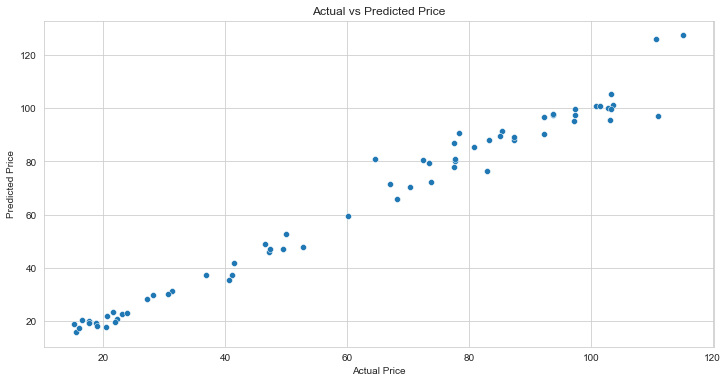

In [23]:
# Since XGB performs best, use xgb calculate y_predict
y_predict = xgb.predict(X_scale_test)

# graph it
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test,y=y_predict)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

### Deep Learning

In [42]:
XtrainScale.shape

(213, 5)

In [45]:
X_scale_train.shape

(200, 5)

#### ANN

In [63]:
from tensorflow import keras
from tensorflow.keras import layers

# Features and optimizers
optimizer = 'adam'

# Model
ann = Sequential()

# Hidden layer 1
ann.add(Dense(16,input_shape= (X_scale_train.shape[1], 1)))
ann.add(layers.Flatten())
ann.add(LeakyReLU(alpha=0.05))

# Hidden layer 2
ann.add(Dense(9))
ann.add(LeakyReLU(alpha=0.05))

# Hidden layer 3
ann.add(Dense(3))
ann.add(LeakyReLU(alpha=0.05))

# output layer
ann.add(Dense(1))
ann.add(LeakyReLU(alpha=0.05))

### compile the model using: optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']
ann.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

# model summary
ann.summary()
# model fit
history = ann.fit(XtrainScale, ytrainScale, epochs=30, batch_size=2, validation_data=(XtestScale, ytestScale),verbose=1)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 5, 16)             32        
                                                                 
 flatten_7 (Flatten)         (None, 80)                0         
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 80)                0         
                                                                 
 dense_70 (Dense)            (None, 9)                 729       
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 9)                 0         
                                                                 
 dense_71 (Dense)            (None, 3)                 30        
                                                                 
 leaky_re_lu_38 (LeakyReLU)  (None, 3)               

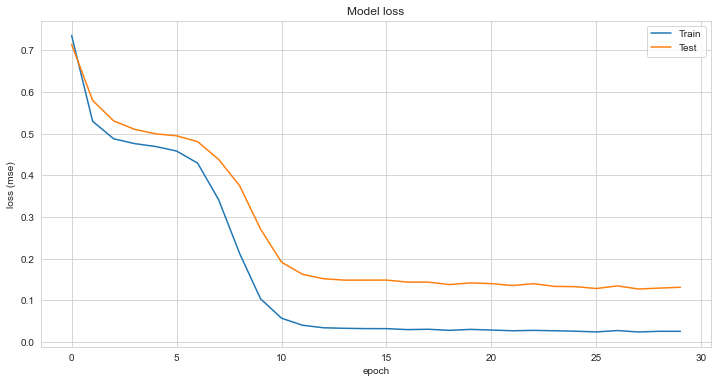

In [61]:
plt.figure(figsize=(12,6))
plt.plot(ann.history.history['loss'][:])
plt.plot(ann.history.history['mae'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Test'], loc='upper right')

In [55]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(X_scale_train.shape[1], 1))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

"""callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
"""
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(XtrainScale, ytrainScale,
                    epochs=40
                    
                    )

#model = keras.models.load_model("jena_dense.keras")
#print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/40
7/7 [==============================] - 0s 4ms/step - loss: 1.3907 - mae: 1.0155
Epoch 2/40
7/7 [==============================] - 0s 4ms/step - loss: 1.2179 - mae: 0.9515
Epoch 3/40
7/7 [==============================] - 0s 5ms/step - loss: 1.0651 - mae: 0.8899
Epoch 4/40
7/7 [==============================] - 0s 4ms/step - loss: 0.9328 - mae: 0.8313
Epoch 5/40
7/7 [==============================] - 0s 4ms/step - loss: 0.8195 - mae: 0.7757
Epoch 6/40
7/7 [==============================] - 0s 4ms/step - loss: 0.7245 - mae: 0.7229
Epoch 7/40
7/7 [==============================] - 0s 4ms/step - loss: 0.6397 - mae: 0.6732
Epoch 8/40
7/7 [==============================] - 0s 4ms/step - loss: 0.5717 - mae: 0.6302
Epoch 9/40
7/7 [==============================] - 0s 4ms/step - loss: 0.5124 - mae: 0.5904
Epoch 10/40
7/7 [==============================] - 0s 4ms/step - loss: 0.4640 - mae: 0.5549
Epoch 11/40
7/7 [==============================] - 0s 4ms/step - loss: 0.4224 - mae: 0.52

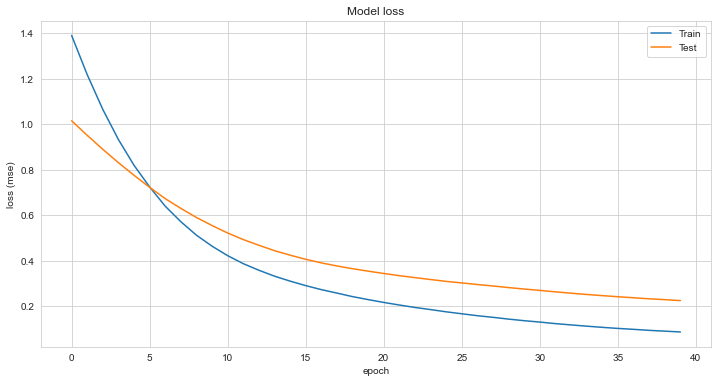

In [57]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['mae'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Test'], loc='upper right')

In [66]:
# Convert to sequence function for TimeSeries to seq models 
def convSeq(feature, target, seq):
    Xs, ys = [],[]
    
    # from 0 to (len - seq)
    for i in range(len(feature) - seq):

        # from i to (i + seq)
        v = feature.iloc[i:(i+seq),0]
        Xs.append(v)

        # target of (i+seq)
        ys.append(target.iloc[i+seq])
    return np.array(Xs), np.array(ys)

# Convert sequence dimenstions
def convDim(feature, target):
    targetArray = np.array(target)
    targetNew = targetArray.reshape(-1,1)
    featureArray = np.array(feature)
    featureNew = featureArray.reshape(featureArray.shape[0], featureArray.shape[1], 1)
    return featureNew, targetNew

#### RNN LSTM

In [75]:
# Convert dimension using convDim
X1, y1 = convSeq(Xtrain, ytrain,6)

In [76]:
X2, y2 = convSeq(Xtest, ytest,6)

In [77]:

xSc = StandardScaler()
ySc = StandardScaler()

X1s = xSc.fit_transform(X1)
X2s = xSc.transform(X2)

y1s = ySc.fit_transform(y1)
y2s = ySc.transform(y2)

In [78]:
X1s.shape

(207, 6)

In [79]:
y1s.shape

(207, 1)

In [83]:
a1,b1 = convDim(X1s,y1s)
a1.shape

(207, 6, 1)

In [84]:
b1.shape

(207, 1)

In [85]:
a2,b2= convDim(X2s,y2s)
a2.shape

(48, 6, 1)

In [107]:
biLSTM = Sequential()

biLSTM.add(Bidirectional(LSTM(units=13,input_shape=(a1[1],a1[2]))))
biLSTM.add(Dense(units=7, activation='selu'))
biLSTM.add(Dense(units=1, activation='selu'))

optimizer = 'adam'
biLSTM.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])

#biLSTM.summary()

history = biLSTM.fit(a1, b1, epochs=5, batch_size=2,verbose=1)


Epoch 1/5
104/104 [==============================] - 22s 180ms/step - loss: 0.6934 - mse: 0.6934 - mae: 0.7163
Epoch 2/5
104/104 [==============================] - 19s 185ms/step - loss: 0.5081 - mse: 0.5081 - mae: 0.5781
Epoch 3/5
104/104 [==============================] - 19s 183ms/step - loss: 0.4055 - mse: 0.4055 - mae: 0.4996
Epoch 4/5
104/104 [==============================] - 18s 175ms/step - loss: 0.3395 - mse: 0.3395 - mae: 0.4553
Epoch 5/5
104/104 [==============================] - 18s 172ms/step - loss: 0.3149 - mse: 0.3149 - mae: 0.4273


In [89]:
biLSTM.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (None, 26)               1560      
 nal)                                                            
                                                                 
 dense_77 (Dense)            (None, 7)                 189       
                                                                 
 dense_78 (Dense)            (None, 1)                 8         
                                                                 
Total params: 1,757
Trainable params: 1,757
Non-trainable params: 0
_________________________________________________________________


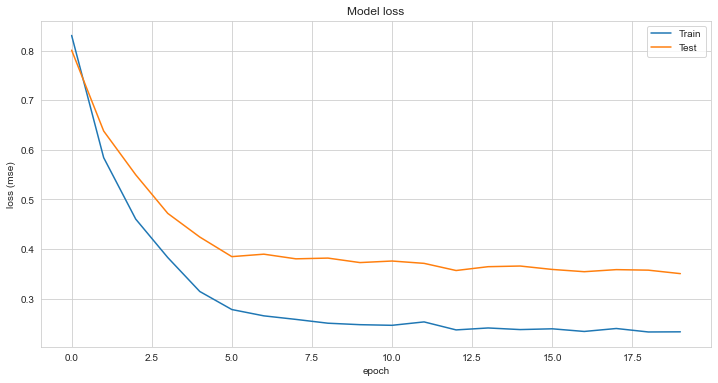

In [90]:
plt.figure(figsize=(12,6))
plt.plot(biLSTM.history.history['loss'][:])
plt.plot(biLSTM.history.history['mae'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Test'], loc='upper right')

Epoch 1/10
97/97 [==============================] - 3s 2ms/step - loss: 16391.5293
Epoch 2/10
97/97 [==============================] - 0s 2ms/step - loss: 923.7256
Epoch 3/10
97/97 [==============================] - 0s 3ms/step - loss: 875.5258
Epoch 4/10
97/97 [==============================] - 0s 2ms/step - loss: 910.3747
Epoch 5/10
97/97 [==============================] - 0s 2ms/step - loss: 911.4551
Epoch 6/10
97/97 [==============================] - 0s 2ms/step - loss: 922.6401
Epoch 7/10
97/97 [==============================] - 0s 2ms/step - loss: 920.1522
Epoch 8/10
97/97 [==============================] - 0s 2ms/step - loss: 931.0806
Epoch 9/10
97/97 [==============================] - 0s 2ms/step - loss: 916.3552
Epoch 10/10
97/97 [==============================] - 0s 3ms/step - loss: 890.4498


In [110]:
a1.shape

(207, 6, 1)

In [111]:
b1.shape

(207, 1)

In [112]:
# Model
model = Sequential()

# Hideen layers
model.add(LSTM(units=8,activation = 'selu', return_sequences=True, return_state=True, input_shape= (a1.shape[1], 1)))
model.add(LSTM(units=4,activation = 'selu', return_sequences=False, return_state=False))
model.add(Dense(units=1, activation='selu'))

### compile the model using: optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']
model.compile(optimizer=optimizer, loss='mse')
history = model.fit(a1, b1, epochs=10, batch_size=2,verbose=1)

ValueError: All layers in a Sequential model should have a single output tensor. For multi-output layers, use the functional API.

In [ ]:
### LSTM

In [113]:
a1.shape

(207, 6, 1)

In [116]:
inputs = keras.Input(shape=(a1.shape[1], 1))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(a1,b1,epochs=50)

Epoch 1/50
7/7 [==============================] - 2s 10ms/step - loss: 0.9708 - mae: 0.8769
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.9047 - mae: 0.8485
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.8637 - mae: 0.8320
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.8306 - mae: 0.8135
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.8006 - mae: 0.7936
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7726 - mae: 0.7758
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7417 - mae: 0.7571
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7124 - mae: 0.7347
Epoch 9/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6812 - mae: 0.7065
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6488 - mae: 0.6829
Epoch 11/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6149 - mae: 0

In [ ]:
# # save best model
# checkpoint = ModelCheckpoint('models/LSTM.h5', monitor='mse', save_best_only=True, verbose=1)

In [ ]:
# fit model
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint])

# fit model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

In [ ]:
y_predict = model.predict(X_test)
plot_results(y_predict,y_test)

## Conclusion


## References


----------
CIS43 Project Link<br>
https://colab.research.google.com/drive/1OS0i9lEitkL7PTE7TpLuWVoqkjS0BPYC
<br>

Load local file onto colab<br>
https://www.youtube.com/watch?v=6HFlwqK3oeo
<br>
<br>

----------
Inflation Data<br>
https://www.usinflationcalculator.com/inflation/current-inflation-rates/#:~:text=The%20annual%20inflation%20rate%20for,at%208%3A30%20a.m.%20ET.
<br>
<br>
Gas Prices<br>
https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021
<br>
<br>